In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/variable_without_pca2.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,NPA_FLAG,LOAN_CAT1
0,0.042612,-0.048785,-0.053259,-0.134894,-0.155864,-0.075719,-0.062581,-0.023629,-0.044929,-0.056843,-0.003142,0.397017,1.805905,0.051895,0,3
1,-0.091396,-0.048785,0.066148,-0.134894,-0.297359,-0.075719,-0.050164,-0.023629,-0.044929,-0.056843,-0.010305,-0.623858,0.600067,-0.067204,0,3
2,-0.076329,-0.048785,0.031772,-0.134894,1.262271,-0.059430,-0.065534,-0.023629,-0.044929,-0.056843,-0.006337,1.417891,1.805905,-0.023470,0,0
3,-0.101346,-0.048785,0.308069,-0.134894,-0.297359,-0.075719,-0.010893,-0.023629,-0.044929,-0.056843,0.017446,-0.623858,0.198120,-0.067204,0,3
4,-0.013879,-0.048785,-0.071656,-0.134894,-0.297359,-0.075719,-0.053618,-0.023629,-0.044929,-0.056843,-0.004448,-0.623858,-0.203826,-0.067204,1,4


In [5]:
df.columns

Index(['SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'NPA_FLAG', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(11836, 16)

In [7]:
df.isna().sum()

SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
NPA_FLAG                     0
LOAN_CAT1                    0
dtype: int64

In [8]:
df1=df[["TOTAL_AVG_BAL","SIX_MONTH_BAL_OS_FD","CUSTOMER_PROFITABILITY","SIX_MONTH_BAL_OS_SAVINGS"
        ,"LOAN_CAT1"]]

In [9]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix


In [11]:
train_set, test_set = train_test_split(df1, test_size=0.3, random_state=0)
train_df = pd.DataFrame(train_set)
test_df = pd.DataFrame(test_set)

In [12]:
df_cat_0 = train_df[train_df.LOAN_CAT1==0]
df_cat_1 = train_df[train_df.LOAN_CAT1==1]
df_cat_2 = train_df[train_df.LOAN_CAT1==2]
df_cat_3 = train_df[train_df.LOAN_CAT1==3]
df_cat_4 = train_df[train_df.LOAN_CAT1==4]
df_cat_5 = train_df[train_df.LOAN_CAT1==5]
df_cat_0.shape,df_cat_1.shape,df_cat_2.shape,df_cat_3.shape,df_cat_4.shape,df_cat_5.shape

((185, 5), (2006, 5), (1246, 5), (3221, 5), (796, 5), (831, 5))

In [13]:
##### The data set is imbalanced

In [14]:

X_train = train_df.drop(columns=["LOAN_CAT1"])
y_train = train_df["LOAN_CAT1"]
X_train.shape, y_train.shape

((8285, 4), (8285,))

In [15]:
X_test = test_df.drop(columns=["LOAN_CAT1"])
y_test = test_df["LOAN_CAT1"]
X_test.shape, y_test.shape

((3551, 4), (3551,))

In [16]:
from sklearn.utils import resample

In [17]:
df_minority = train_df[train_df["LOAN_CAT1"] == 0]
df_majority_1 = train_df[train_df["LOAN_CAT1"] == 1]
df_majority_2 = train_df[train_df["LOAN_CAT1"] == 2]
df_majority_3 = train_df[train_df["LOAN_CAT1"] == 3]
df_majority_4 = train_df[train_df["LOAN_CAT1"] == 4]
df_majority_5 = train_df[train_df["LOAN_CAT1"] == 5]

## Undersampling

In [18]:
from sklearn.utils import resample
df_majority_1_downsampled = resample(df_majority_1, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_2_downsampled = resample(df_majority_2, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_3_downsampled = resample(df_majority_3, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_4_downsampled = resample(df_majority_4, replace=True, n_samples=len(df_minority), random_state=42)
df_majority_5_downsampled = resample(df_majority_5, replace=True, n_samples=len(df_minority), random_state=42)

In [19]:
train_downsampled = pd.concat([df_minority,
                             df_majority_1_downsampled,
                             df_majority_2_downsampled,
                             df_majority_3_downsampled,
                             df_majority_4_downsampled,
                             df_majority_5_downsampled,
                             ])

In [20]:
train_downsampled["LOAN_CAT1"].value_counts()

0    185
1    185
2    185
3    185
4    185
5    185
Name: LOAN_CAT1, dtype: int64

In [21]:
X_under = train_downsampled.drop("LOAN_CAT1", axis=1)
Y_under = train_downsampled["LOAN_CAT1"]

X_under.shape, X_test.shape,X_under.shape, y_test.shape

((1110, 4), (3551, 4), (1110, 4), (3551,))

### Tree based models

###### Decision Tree

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [23]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_under, Y_under)
y_pred_DT = decision_tree.predict(X_test)

In [24]:
acc = accuracy_score(y_test, y_pred_DT)
prec_macro = precision_score(y_test, y_pred_DT, average='macro')
recall_macro = recall_score(y_test, y_pred_DT, average='macro')
f1_macro = f1_score(y_test, y_pred_DT, average='macro')
classification_rep = classification_report(y_test, y_pred_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(cf_matrix)
print("\n Test Classification Report:\n", classification_rep)

Accuracy Score: 0.5074626865671642
Precision (Macro): 0.4659335239415328
Recall (Macro): 0.5372012894602417
F1 Score (Macro): 0.4687363190235128
Confusion Matrix:
[[ 44  16   6   4   0   3]
 [172 337 261  64   9   4]
 [ 37 113 265 131  18  11]
 [ 35  93 217 703 207  72]
 [  5  10   5  72 183  63]
 [  5   0   8  18  90 270]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.60      0.24        73
           1       0.59      0.40      0.48       847
           2       0.35      0.46      0.40       575
           3       0.71      0.53      0.61      1327
           4       0.36      0.54      0.43       338
           5       0.64      0.69      0.66       391

    accuracy                           0.51      3551
   macro avg       0.47      0.54      0.47      3551
weighted avg       0.57      0.51      0.52      3551



In [25]:

y_pred_train_DT = decision_tree.predict(X_under)

In [26]:
acc = accuracy_score(Y_under, y_pred_train_DT)
prec_macro = precision_score(Y_under, y_pred_train_DT, average='macro')
recall_macro = recall_score(Y_under, y_pred_train_DT, average='macro')
f1_macro = f1_score(Y_under, y_pred_train_DT, average='macro')
classification_rep_DT = classification_report(Y_under,y_pred_train_DT)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT = confusion_matrix(Y_under, y_pred_train_DT)
print("Confusion Matrix:")
print(cf_matrix_DT)
print("\n Train Classification Report:\n", classification_rep_DT)

Accuracy Score: 1.0
Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0
Confusion Matrix:
[[185   0   0   0   0   0]
 [  0 185   0   0   0   0]
 [  0   0 185   0   0   0]
 [  0   0   0 185   0   0]
 [  0   0   0   0 185   0]
 [  0   0   0   0   0 185]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       185
           4       1.00      1.00      1.00       185
           5       1.00      1.00      1.00       185

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110



In [27]:
#plt.figure(figsize=(16,8))
#tree.plot_tree(decision_tree)
#plt.show()

###### pre pruning

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
        'max_depth': range(2,50,1),
        'min_samples_split': range(1,5,1),
        'min_samples_leaf': range(2,5,1)}

In [30]:
dtree = tree.DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_under, Y_under)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", li

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 50),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(1, 5)})

In [31]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [32]:
best_dtree_pp = DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=2)
best_dtree_pp.fit(X_under, Y_under)
y_pred_pre = best_dtree_pp.predict(X_test)

In [33]:
acc = accuracy_score(y_test, y_pred_pre)
prec_macro = precision_score(y_test, y_pred_pre, average='macro')
recall_macro = recall_score(y_test, y_pred_pre, average='macro')
f1_macro = f1_score(y_test, y_pred_pre, average='macro')
classification_rep_pre = classification_report(y_test, y_pred_pre)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_pre = confusion_matrix(y_test, y_pred_pre)
print("Confusion Matrix:")
print(cf_matrix_pre)
print("\n Test Classification Report:\n", classification_rep_pre)

Accuracy Score: 0.5164742326105323
Precision (Macro): 0.4936428950074973
Recall (Macro): 0.5620381704207148
F1 Score (Macro): 0.48424534009075965
Confusion Matrix:
[[ 46  14  10   1   0   2]
 [194 308 282  50  13   0]
 [ 33  95 304 116  23   4]
 [ 54  85 197 689 264  38]
 [  5   8   5  60 212  48]
 [  7   0   9  10  90 275]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.63      0.22        73
           1       0.60      0.36      0.45       847
           2       0.38      0.53      0.44       575
           3       0.74      0.52      0.61      1327
           4       0.35      0.63      0.45       338
           5       0.75      0.70      0.73       391

    accuracy                           0.52      3551
   macro avg       0.49      0.56      0.48      3551
weighted avg       0.60      0.52      0.54      3551



In [34]:
y_pred_pre_train = best_dtree_pp.predict(X_under)

In [35]:
acc = accuracy_score(Y_under, y_pred_pre_train )
prec_macro = precision_score(Y_under, y_pred_pre_train , average='macro')
recall_macro = recall_score(Y_under, y_pred_pre_train, average='macro')
f1_macro = f1_score(Y_under, y_pred_pre_train , average='macro')
classification_rep_pre_train = classification_report(Y_under,y_pred_pre_train)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_DT_pre = confusion_matrix(Y_under, y_pred_pre_train)
print("Confusion Matrix:")
print(cf_matrix_DT_pre)
print("\n Train Classification Report:\n", classification_rep_pre_train )

Accuracy Score: 0.8441441441441442
Precision (Macro): 0.8467899253050818
Recall (Macro): 0.8441441441441442
F1 Score (Macro): 0.8437415438183248
Confusion Matrix:
[[162  11   8   3   1   0]
 [ 23 132  25   3   2   0]
 [  2  14 161   6   2   0]
 [  2   2  14 147  20   0]
 [  0   1   1  10 166   7]
 [  2   1   3   3   7 169]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       185
           1       0.82      0.71      0.76       185
           2       0.76      0.87      0.81       185
           3       0.85      0.79      0.82       185
           4       0.84      0.90      0.87       185
           5       0.96      0.91      0.94       185

    accuracy                           0.84      1110
   macro avg       0.85      0.84      0.84      1110
weighted avg       0.85      0.84      0.84      1110



In [36]:
from sklearn.metrics import roc_curve,auc
y_prob_dt1=best_dtree_pp.predict_proba(X_test)

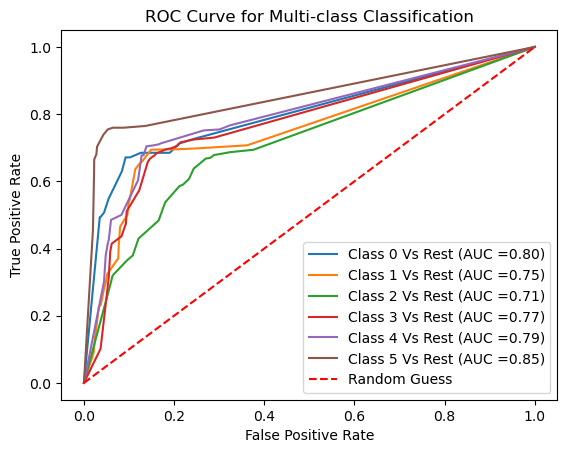

In [37]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob_dt1[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_dt1,multi_class='ovr')

0.7797461610320019

#### post pruning

In [39]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [40]:
path = decision_tree.cost_complexity_pruning_path(X_under, Y_under)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.0006006  0.0006006  0.00067568 0.00067568 0.00069246
 0.00072072 0.00072072 0.00072072 0.00072072 0.00072072 0.00072072
 0.00072072 0.00075075 0.0007722  0.0007722  0.0007722  0.0007722
 0.00078829 0.00078829 0.00081081 0.00082583 0.0008316  0.0008316
 0.00083655 0.00085586 0.00087087 0.00087588 0.00087945 0.0009009
 0.0009009  0.0009009  0.0009009  0.0009009  0.0009009  0.0009009
 0.0009009  0.0009009  0.0009009  0.0009009  0.0009009  0.0009009
 0.0009009  0.0009009  0.0009009  0.0009009  0.0009009  0.0009009
 0.00092664 0.00094943 0.00096096 0.00096096 0.00096096 0.00099099
 0.00099099 0.00100862 0.00101759 0.00107184 0.00108108 0.00108108
 0.00108543 0.00110565 0.00110565 0.00111862 0.00115527 0.0011583
 0.00117117 0.00117117 0.0011777  0.0012012  0.0012012  0.0012012
 0.0012012  0.0012012  0.0012012  0.0012012  0.0012012  0.0012012
 0.0012012  0.0012012  0.00121506 0.00122623 0.00124215 0.00124597
 0.00125343 0.00126126 0.00129695 0.0013104  0.00131381 0.0013299
 0.00

In [41]:
# For each alpha we will append our model to a list
decision_trees = []
for ccp_alpha in ccp_alphas:
    decision_tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    decision_tree.fit(X_under, Y_under)
    decision_trees.append(decision_tree)
print("Number of nodes in the last tree is :{} with ccp_alpha:{}".format(
decision_trees[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is :1 with ccp_alpha:0.11925727009607756


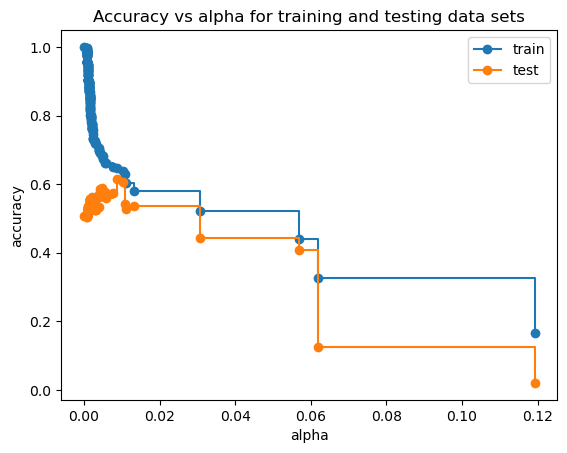

In [42]:
train_scores=[decision_tree.score(X_under, Y_under) for decision_tree in decision_trees]
test_scores=[decision_tree.score(X_test, y_test) for decision_tree in decision_trees]

fig,ax =plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")

ax.legend()
plt.show()

In [43]:
decision_tree = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
decision_tree.fit(X_under, Y_under)
y_train_pred_po = decision_tree.predict(X_under)
y_test_pred_po = decision_tree.predict(X_test)



In [44]:
acc = accuracy_score(y_test, y_test_pred_po)
prec_macro = precision_score(y_test, y_test_pred_po, average='macro')
recall_macro = recall_score(y_test, y_test_pred_po, average='macro')
f1_macro = f1_score(y_test, y_test_pred_po, average='macro')
classification_rep_po = classification_report(y_test, y_test_pred_po)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po= confusion_matrix(y_test, y_test_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\n Test Classification Report:\n", classification_rep_po)

Accuracy Score: 0.587721768515911
Precision (Macro): 0.5539356554185888
Recall (Macro): 0.6177751096145194
F1 Score (Macro): 0.5580636897988093
Confusion Matrix:
[[ 38  23   8   2   0   2]
 [119 450 213  50  15   0]
 [  8 139 336  68  20   4]
 [  6  40 281 698 270  32]
 [  1   0  11  43 248  35]
 [  0   1   1   7  65 317]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.52      0.31        73
           1       0.69      0.53      0.60       847
           2       0.40      0.58      0.47       575
           3       0.80      0.53      0.64      1327
           4       0.40      0.73      0.52       338
           5       0.81      0.81      0.81       391

    accuracy                           0.59      3551
   macro avg       0.55      0.62      0.56      3551
weighted avg       0.66      0.59      0.60      3551



In [45]:
acc = accuracy_score(Y_under, y_train_pred_po )
prec_macro = precision_score(Y_under, y_train_pred_po , average='macro')
recall_macro = recall_score(Y_under, y_train_pred_po, average='macro')
f1_macro = f1_score(Y_under, y_train_pred_po , average='macro')
classification_rep_DT_po = classification_report(Y_under,y_train_pred_po )
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_po = confusion_matrix(Y_under, y_train_pred_po)
print("Confusion Matrix:")
print(cf_matrix_po)
print("\n Test Classification Report:\n", classification_rep_DT_po)

Accuracy Score: 0.681981981981982
Precision (Macro): 0.6922551339712696
Recall (Macro): 0.6819819819819819
F1 Score (Macro): 0.6825271376297278
Confusion Matrix:
[[118  44  15   4   3   1]
 [ 22 123  30   7   3   0]
 [  1  44 118  19   2   1]
 [  0   4  43  98  39   1]
 [  0   0   0  19 141  25]
 [  0   1   1   4  20 159]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.72       185
           1       0.57      0.66      0.61       185
           2       0.57      0.64      0.60       185
           3       0.65      0.53      0.58       185
           4       0.68      0.76      0.72       185
           5       0.85      0.86      0.85       185

    accuracy                           0.68      1110
   macro avg       0.69      0.68      0.68      1110
weighted avg       0.69      0.68      0.68      1110



In [46]:
y_prob_dt2=decision_tree.predict_proba(X_test)

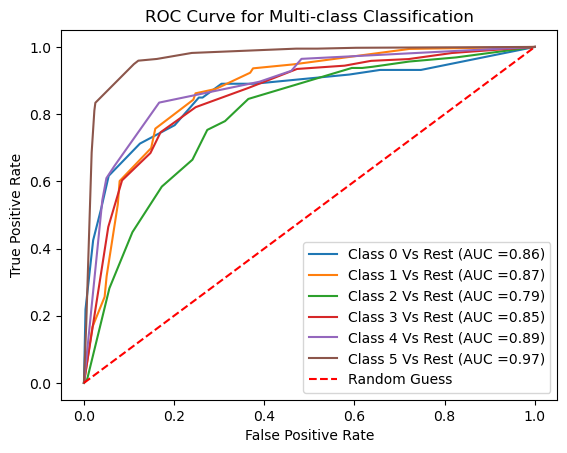

In [47]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob_dt2[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_dt2,multi_class='ovr')

0.8726573756969156